In [1]:
from statsbombpy import sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch, VerticalPitch

# Configuration des graphiques
plt.style.use('dark_background')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Bibliothèques chargées avec succès !")

✅ Bibliothèques chargées avec succès !


In [ ]:
competitions = sb.competitions()

print("📋 COMPÉTITIONS DISPONIBLES (gratuites) :\n")
print(competitions[['competition_id', 'season_id', 'competition_name', 
                    'season_name', 'country_name']])

print("\n💡 Note : Utilise competition_id et season_id pour charger les matchs")

In [2]:
COMPETITION_ID = 55
SEASON_ID = 282

matches = sb.matches(competition_id=COMPETITION_ID, season_id=SEASON_ID)

print(f"\n🏆 MATCHS - Euro 2024")
print(f"Nombre de matchs : {len(matches)}")
print("\nAperçu des matchs :")
print(matches[['match_id', 'match_date', 'home_team', 'away_team', 
               'home_score', 'away_score']].head(10))

NameError: name 'sb' is not defined

In [4]:
MATCH_ID = 3943043

# Charger les événements du match
events = sb.events(match_id=MATCH_ID)

print(f"\n⚽ ÉVÉNEMENTS DU MATCH ID {MATCH_ID}")
print(f"Nombre total d'événements : {len(events)}")
print(f"\nColonnes disponibles : {list(events.columns)}")

# Aperçu des données
print("\nPremiers événements :")
print(events[['minute', 'second', 'type', 'team', 'player', 'location']].head(10))


⚽ ÉVÉNEMENTS DU MATCH ID 3943043
Nombre total d'événements : 3312

Colonnes disponibles : ['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure', 'block_deflection', 'block_offensive', 'block_save_block', 'carry_end_location', 'clearance_aerial_won', 'clearance_body_part', 'clearance_head', 'clearance_left_foot', 'clearance_right_foot', 'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage', 'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage', 'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain', 'interception_outcome', 'location', 'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location', 'pass_goal_assist', 'pa


📊 DISTRIBUTION DES TYPES D'ÉVÉNEMENTS :
type
Pass                 917
Ball Receipt*        878
Carry                759
Pressure             327
Ball Recovery         71
Duel                  70
Block                 43
Clearance             43
Goal Keeper           30
Shot                  25
Dribble               24
Dispossessed          23
Foul Won              19
Foul Committed        19
Miscontrol            12
Dribbled Past         10
Interception           7
Substitution           7
Injury Stoppage        6
Half End               4
Half Start             4
50/50                  4
Tactical Shift         3
Starting XI            2
Referee Ball-Drop      2
Shield                 2
Error                  1
Name: count, dtype: int64


FileNotFoundError: [Errno 2] No such file or directory: '/workspace/outputs/figures/event_types.png'

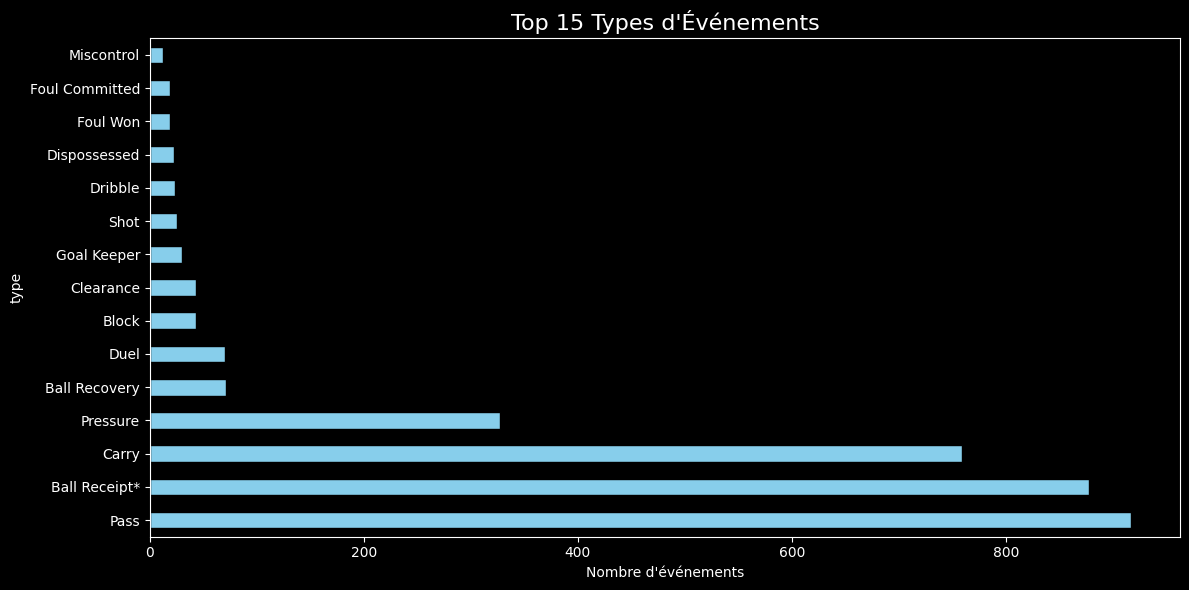

In [5]:
print("\n📊 DISTRIBUTION DES TYPES D'ÉVÉNEMENTS :")
event_counts = events['type'].value_counts()
print(event_counts)

# Graphique
plt.figure(figsize=(12, 6))
event_counts.head(15).plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 15 Types d\'Événements', size=16)
plt.xlabel('Nombre d\'événements')
plt.tight_layout()
plt.savefig('/app/outputs/figures/event_types.png', dpi=300, bbox_inches='tight')
plt.show()


📊 DISTRIBUTION DES TYPES D'ÉVÉNEMENTS :
type
Pass                 917
Ball Receipt*        878
Carry                759
Pressure             327
Ball Recovery         71
Duel                  70
Block                 43
Clearance             43
Goal Keeper           30
Shot                  25
Dribble               24
Dispossessed          23
Foul Won              19
Foul Committed        19
Miscontrol            12
Dribbled Past         10
Interception           7
Substitution           7
Injury Stoppage        6
Half End               4
Half Start             4
50/50                  4
Tactical Shift         3
Starting XI            2
Referee Ball-Drop      2
Shield                 2
Error                  1
Name: count, dtype: int64


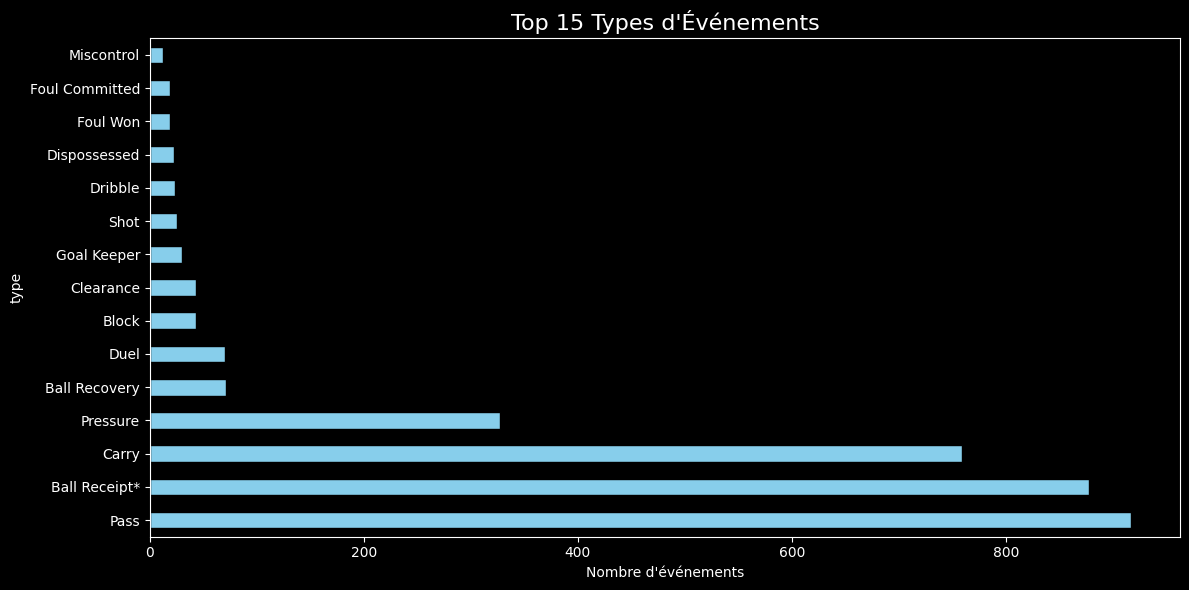

In [6]:
print("\n📊 DISTRIBUTION DES TYPES D'ÉVÉNEMENTS :")
event_counts = events['type'].value_counts()
print(event_counts)

# Graphique
plt.figure(figsize=(12, 6))
event_counts.head(15).plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 15 Types d\'Événements', size=16)
plt.xlabel('Nombre d\'événements')
plt.tight_layout()
plt.savefig('/app/outputs/figures/event_types.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
shots = events[events['type'] == 'Shot'].copy()

print(f"\n🎯 ANALYSE DES TIRS")
print(f"Nombre total de tirs : {len(shots)}")
print(f"\nTirs par équipe :")
print(shots['team'].value_counts())

print(f"\nIssues des tirs :")
print(shots['shot_outcome'].value_counts())

# Statistiques xG
if 'shot_statsbomb_xg' in shots.columns:
    print(f"\nxG total par équipe :")
    xg_by_team = shots.groupby('team')['shot_statsbomb_xg'].sum()
    print(xg_by_team)



🎯 ANALYSE DES TIRS
Nombre total de tirs : 25

Tirs par équipe :
team
Spain      16
England     9
Name: count, dtype: int64

Issues des tirs :
shot_outcome
Blocked    9
Off T      6
Saved      6
Goal       3
Wayward    1
Name: count, dtype: int64

xG total par équipe :
team
England    0.726378
Spain      1.791713
Name: shot_statsbomb_xg, dtype: float64


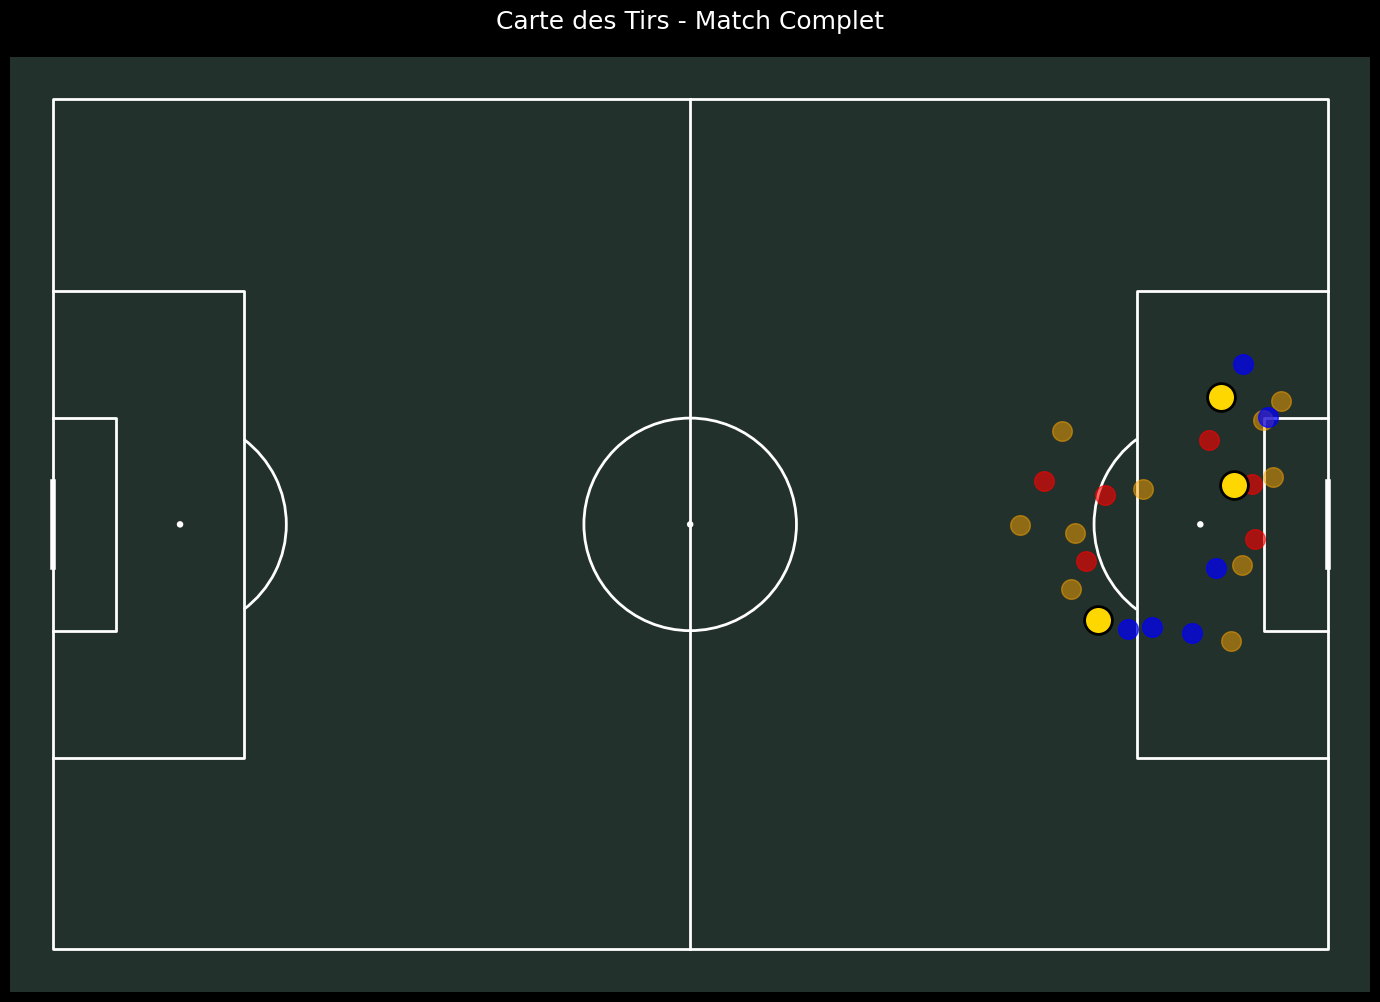

In [8]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='white')
fig, ax = pitch.draw(figsize=(14, 10))

# Tracer les tirs
for idx, shot in shots.iterrows():
    x, y = shot['location']
    outcome = shot['shot_outcome']
    
    if outcome == 'Goal':
        pitch.scatter(x, y, ax=ax, s=400, color='gold', 
                     edgecolors='black', linewidth=2, zorder=3, label='But')
    elif outcome == 'Saved':
        pitch.scatter(x, y, ax=ax, s=200, color='blue', 
                     alpha=0.7, zorder=2, label='Arrêt')
    elif outcome == 'Off T':
        pitch.scatter(x, y, ax=ax, s=200, color='red', 
                     alpha=0.6, zorder=1, label='Hors cadre')
    else:
        pitch.scatter(x, y, ax=ax, s=200, color='orange', 
                     alpha=0.5, zorder=1, label='Autre')

plt.title('Carte des Tirs - Match Complet', color='white', size=18, pad=20)
plt.tight_layout()
plt.savefig('/app/outputs/figures/shot_map_complete.png', dpi=300, bbox_inches='tight')
plt.show()

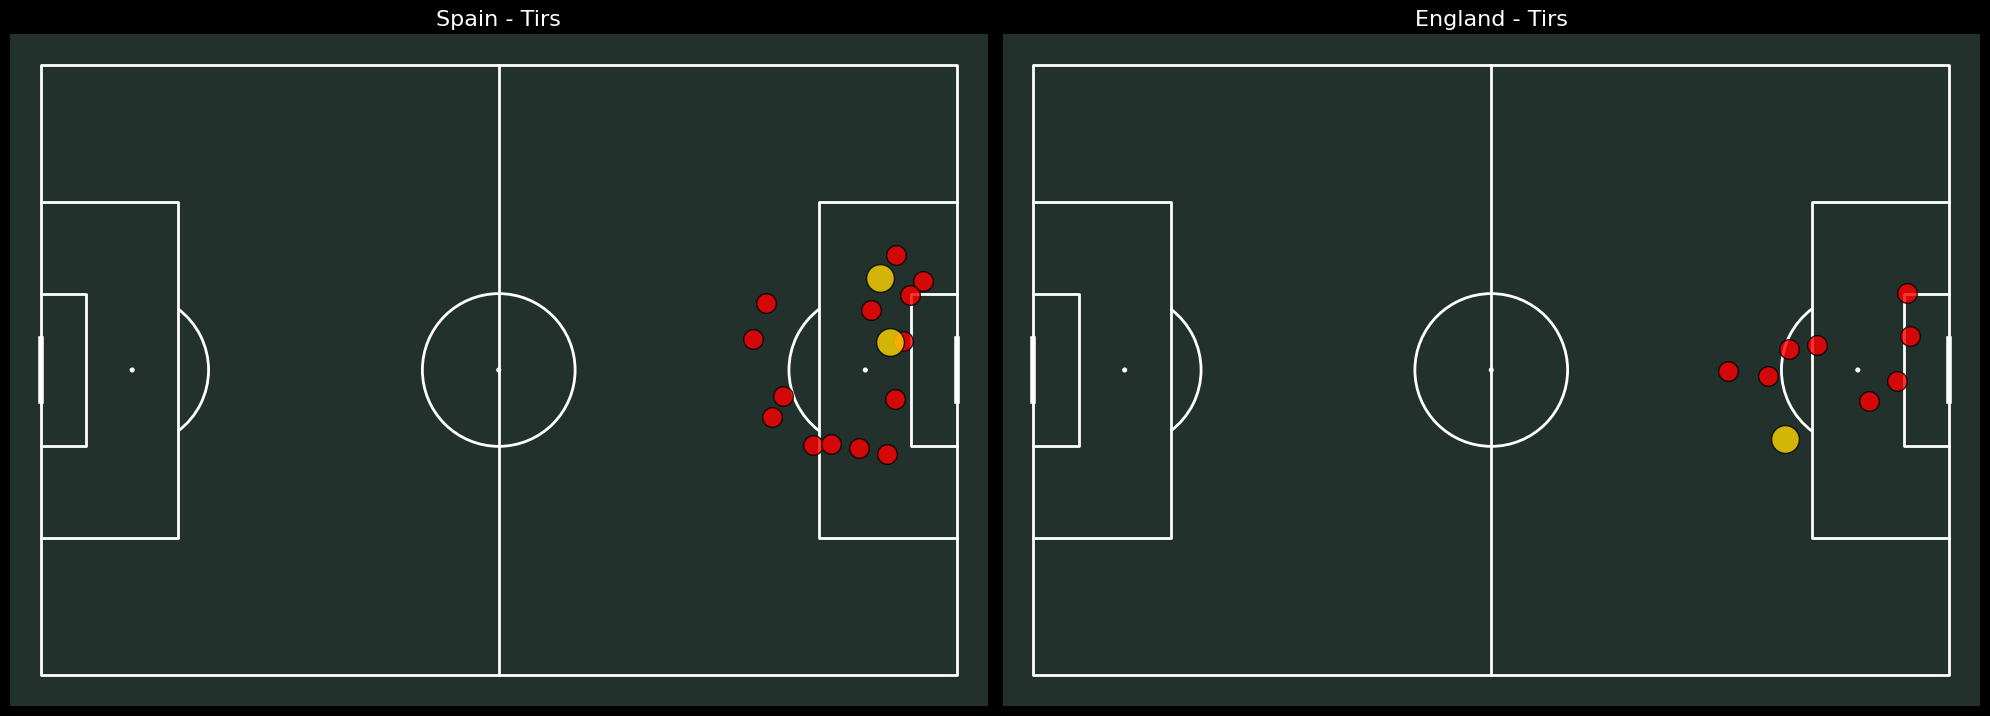

In [10]:
teams = shots['team'].unique()

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

for idx, team in enumerate(teams):
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='white')
    pitch.draw(ax=axes[idx])
    
    team_shots = shots[shots['team'] == team]
    
    for _, shot in team_shots.iterrows():
        x, y = shot['location']
        color = 'gold' if shot['shot_outcome'] == 'Goal' else 'red'
        size = 400 if shot['shot_outcome'] == 'Goal' else 200
        
        pitch.scatter(x, y, ax=axes[idx], color=color, s=size, 
                     edgecolors='black', alpha=0.8)
    
    axes[idx].set_title(f'{team} - Tirs', color='white', size=16)

plt.tight_layout()
plt.savefig('/app/outputs/figures/shot_map_by_team.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
passes = events[events['type'] == 'Pass'].copy()

print(f"\n🔄 ANALYSE DES PASSES")
print(f"Nombre total de passes : {len(passes)}")

# Passes réussies vs ratées
if 'pass_outcome' in passes.columns:
    passes['successful'] = passes['pass_outcome'].isna()
    success_rate = passes['successful'].mean() * 100
    
    print(f"\nTaux de réussite global : {success_rate:.1f}%")
    
    print(f"\nTaux de réussite par équipe :")
    team_success = passes.groupby('team')['successful'].mean() * 100
    print(team_success)


🔄 ANALYSE DES PASSES
Nombre total de passes : 917

Taux de réussite global : 84.2%

Taux de réussite par équipe :
team
England    78.395062
Spain      87.352445
Name: successful, dtype: float64


In [12]:
PLAYER_NAME = 'Lamine Yamal Nasraoui Ebana'  # Exemple

player_events = events[events['player'] == PLAYER_NAME].copy()

if len(player_events) > 0:
    print(f"\n👤 HEATMAP - {PLAYER_NAME}")
    print(f"Nombre d'événements : {len(player_events)}")
    
    # Extraire les positions
    positions = []
    for _, event in player_events.iterrows():
        if pd.notna(event['location']):
            positions.append(event['location'])
    
    if positions:
        positions = np.array(positions)
        
        pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', 
                     line_color='white', line_zorder=2)
        fig, ax = pitch.draw(figsize=(12, 8))
        
        # Heatmap
        pitch.kdeplot(positions[:, 0], positions[:, 1], ax=ax, 
                     cmap='hot', shade=True, alpha=0.7, zorder=1)
        
        plt.title(f'Heatmap - {PLAYER_NAME}', color='white', size=16)
        plt.tight_layout()
        plt.savefig(f'/app/outputs/figures/heatmap_{PLAYER_NAME.replace(" ", "_")}.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()
else:
    print(f"⚠️  Joueur '{PLAYER_NAME}' non trouvé dans ce match")


👤 HEATMAP - Lamine Yamal Nasraoui Ebana
Nombre d'événements : 148


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()